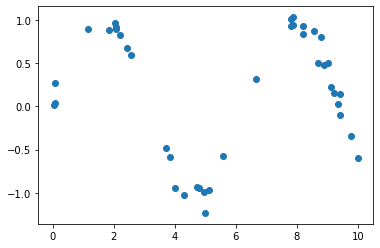

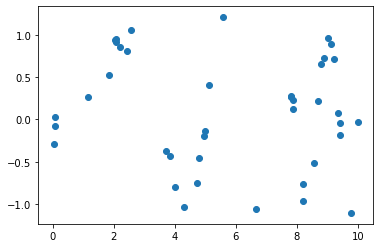

In [43]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Predicting functions of spatial dimensions - Big Idea - relative certainties
def func1(x):
    return math.sin(x) + np.random.normal(0, .1)

def func2(x):
    return math.sin(x**2/4) + np.random.normal(0, .1)

inputs = np.random.uniform(low=0, high=10, size=40)
outputs1 = np.array([func1(x) for x in inputs])
outputs2 = np.array([func2(x) for x in inputs])

inputs, outputs1, outputs2 = inputs.reshape(-1, 1), outputs1.reshape(-1, 1), outputs2.reshape(-1, 1)

plt.scatter(inputs, outputs1)
plt.show()
plt.scatter(inputs, outputs2)
plt.show()

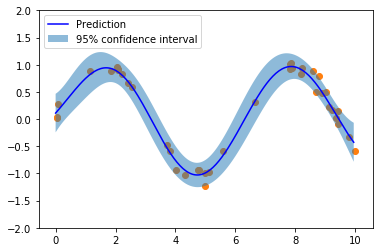

In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF
kernel = RBF()
gp = GaussianProcessRegressor(kernel = kernel, alpha=.1) # alpha is an initial noise estimate
gp.fit(inputs, outputs1)
xvals = np.arange(0, 10, .05).reshape(-1, 1)
y_pred, sigma = gp.predict(xvals, return_std=True)
#print(y_pred.shape)
#print(sigma.shape)
plt.plot(xvals, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([xvals[:,0], xvals[::-1,0]]),
         np.concatenate([y_pred[:,0] - 1.9600 * sigma, (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
         alpha=.5, label='95% confidence interval')
plt.scatter(inputs, outputs1)
plt.ylim(-2, 2)
plt.legend(loc='upper left')
plt.show()

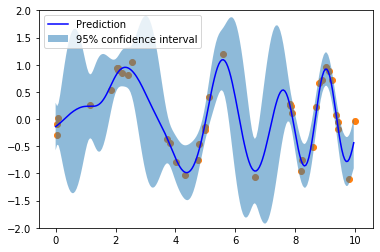

In [47]:
kernel = RBF()
gp = GaussianProcessRegressor(kernel = kernel, alpha=.1) # alpha is an initial noise estimate
gp.fit(inputs, outputs2)
xvals = np.arange(0, 10, .05).reshape(-1, 1)
y_pred, sigma = gp.predict(xvals, return_std=True)
#print(y_pred.shape)
#print(sigma.shape)
plt.plot(xvals, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([xvals[:,0], xvals[::-1,0]]),
         np.concatenate([y_pred[:,0] - 1.9600 * sigma, (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
         alpha=.5, label='95% confidence interval')
plt.ylim(-2, 2)
plt.scatter(inputs, outputs2)
plt.legend(loc='upper left')
plt.show()

# Assignment
1. Plot performance of the Gaussian Process vs. the Number of Points
2. Plot performance of the Gaussian Process vs. the Noise Parameter

# Stretch Goals
- There are other kernels available in sklearn. Try RBF + White Kernel. Try other combinations of kernels available at [scikit-learn.org](https://scikit-learn.org/stable/modules/classes.html). (CTRL+F for gaussian process)